
  <h1 class="display-3">Loss Estimation of Car Loan in Python</h1>
  <h3>Using Linear Regression with Scikit Learn Package</h3>
  
<hr>
<h4> This the same project as Project-I but the model is made  Scikit Learn Package</h4>

<h3> Data Variables and Description </h3>
<table>
 <tr> <th align="left">Variable</th> <th align="left">Description</th> </tr>
 <tr> <td>Ac_No</td> <td>The account of customer used as identifier</td> </tr>
 <tr> <td>Age</td> <td>Age of borrower (16-70)</td> </tr>
 <tr> <td>Years of Experience</td> <td>Working experience (0-53)</td> </tr>
 <tr> <td>Number of Cars</td> <td>Number of Possessed cars (1, 2, 3, 4)</td> </tr>
 <tr> <td>Gender</td> <td>Male/Female</td> </tr>
 <tr> <td>Married</td> <td>Married/Single</td> </tr>
 <tr> <td>Loss in Thousands	</td> <td>Target Variable : Loss Ammount</td> </tr>			
</table>

<h3> Given Dataset File</h3>
* [Loss_Data](https://github.com/D-Satyajit/iMarticus-Projects/blob/master/Datasets/Loss.csv)

<a id="head"></a>

## Index
 - [Importing Datasets](#ImportingDatasets)
 - [Finding NULL Values](#FindNULLVal) 
 - [Counting Levels in Datasets](#CountDSLevels) 
 - [Treating NULL Values & Converting Variables into 0's and 1's](#TreatNULLVal) 
 - [Plot and Graphs](#Plots) 
 - [Linear Regression (using Scikit Learn)](#linearreg) 
 - [Winsorization](#winsorization) 
 - [Conclusion](#conclusion) 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import pylab as pl

<a id="ImportingDatasets"></a>
# Importing Dataset
<hr>

In [4]:
# Importing Train Datset
loss_data = pd.read_csv("F:/Lectures/Data Science/iMarticus/Python/Project/Datasets/Loss.csv")
loss_data = pd.DataFrame(loss_data)
loss_data.shape # Shape gives you total number of observations and variables present in datasets

(15290, 7)

In [5]:
loss_data.info() # Info gives you name of each variable with the data type associated with it.
loss_data.head(3) # Head gives you first few rows of the dataset. (3 is the nummber of rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096


**We will be fixing the column names with underscore, the column name with space is not proper method and pandas will find difficult to read it.**

In [6]:
loss_data.columns

Index(['Ac_No', 'Age', 'Years of Experience', 'Number of Vehicles', 'Gender',
       'Married', 'Losses in Thousands'],
      dtype='object')

In [7]:
loss_data.columns = ['Ac_No', 'Age', 'Years_of_Experience', 'Number_of_Vehicles', 'Gender','Married', 'Losses_in_Thousands']

In [8]:
loss_data.head(2)

,Ac_No,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302


<a id="FindNULLVal"></a>
# Finding NULL Values
<hr>

In [9]:
loss_data.isnull().sum() # Gives Variable wise NaN values

Ac_No                  0
Age                    0
Years_of_Experience    0
Number_of_Vehicles     0
Gender                 0
Married                0
Losses_in_Thousands    0
dtype: int64

In [10]:
loss_data.isnull().sum().sum()

0

It seems there are no NaN values present in the given dataset. <br>
**But before proceeding further we will be deleting the unwanted variable - Ac_No**

In [11]:
loss_data = loss_data.drop(['Ac_No'], 1) # Note: axis=1 denotes that we are referring to a column, not a row. 0 is for row.

In [12]:
loss_data.head(5)

,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,24,5,1,M,Married,203.319595
1,31,10,1,F,Single,402.197302
2,56,37,1,M,Married,553.132096
3,52,31,1,F,Married,292.430579
4,20,3,1,M,Single,246.540576


<a id="CountDSLevels"></a>
# Counting Levels in Datasets
<hr>
Counting the levels of variables in the dataset is important because it shows the distribution of elements in a categorical variable. In addition to that, it also shows the wrongly entered elements.

In [13]:
loss_data.Number_of_Vehicles.value_counts()

2    5152
3    5095
1    2533
4    2510
Name: Number_of_Vehicles, dtype: int64

In [14]:
loss_data.Gender.value_counts()

F    7747
M    7543
Name: Gender, dtype: int64

In [15]:
loss_data.Married.value_counts()

Married    7783
Single     7507
Name: Married, dtype: int64

Since there are no NaN values and now incorrectly entered variables in the dataset we now will directly move to converting variables into numerical form i.e. 0's and 1's.

<a id="TreatNULLVal"></a>


# Treating NULL Values and Converting Variables into 0's and 1's 
<hr>

### Key

* **Gender**          : Male=1 | Female=0
* **Married** 	      : Single=1 | Married=0


### Categorical Encoding
* The idea is to convert the all categorical variable into 0s, 1s, 2s, etc and into numeric integers. It is always a good practice to convert things into numerical values because its all about mathematical calculations.
* To do this we have LabelEncoder package from SciKit learn that encodes the labels with the value between **0 and n_classes-1**. Though there are several other [methods](http://pbpython.com/categorical-encoding.html) to do this. [Label Encoder Help](https://chrisalbon.com/machine-learning/convert_pandas_categorical_column_into_integers_for_scikit-learn.html)
* The **fit_transform(y)** function fit label encoder (male/female) and return encoded labels (1/0)
* By default the fit_transform() function will encode the NaN values also. So, we have to take care of them in a best possible way.

In [16]:
# Importing the LabelEncoder Libraries
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [17]:
loss_data['Gender'] = number.fit_transform(loss_data['Gender'].astype('str')) # This makes two levels 0 and 1
loss_data['Married'] = number.fit_transform(loss_data['Married'].astype('str'))

In [18]:
loss_data.head(5)

,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,24,5,1,1,0,203.319595
1,31,10,1,0,1,402.197302
2,56,37,1,1,0,553.132096
3,52,31,1,0,0,292.430579
4,20,3,1,1,1,246.540576


<a id="Plots"></a>
# Plot and Graphs 
<hr>
Now, we are going to make some graphs to see the visualization of train dataset. For this I am going to used seaborn package, that is a is a Python visualization library based on matplotlib.[More Info.](https://seaborn.pydata.org/introduction.html#introduction)

## Heatmap

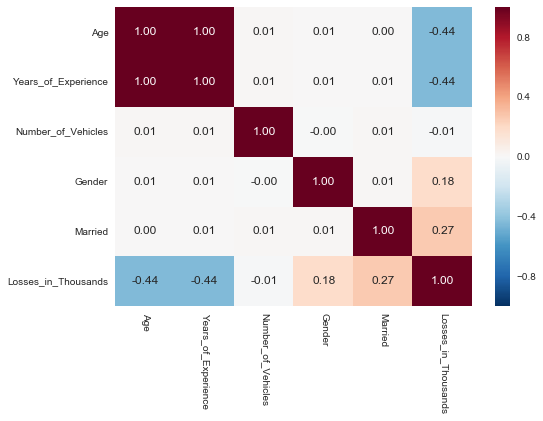

In [19]:
# Calculate correlations Using Heatmap
corr = loss_data.corr()
sns.heatmap(corr, annot=True, fmt="0.2f"); # annot:write the data value in each cell | fmt:String formatting code d=decimal f=float  
plt.xticks(rotation=-90) # Heatmap
plt.show()

The scale shows Pearson Coefficient (-1 to 1), the values near to 1 or -1 have a high correlation. <br>
The heat map clearly shows that there are very fewer correlations between most of the variables and a target variable **Losses_in_Thousands**. Only **Age, Years_of_Experience, and Married** have a good correlation with **Losses_in_Thousands**.

## Pair Plot

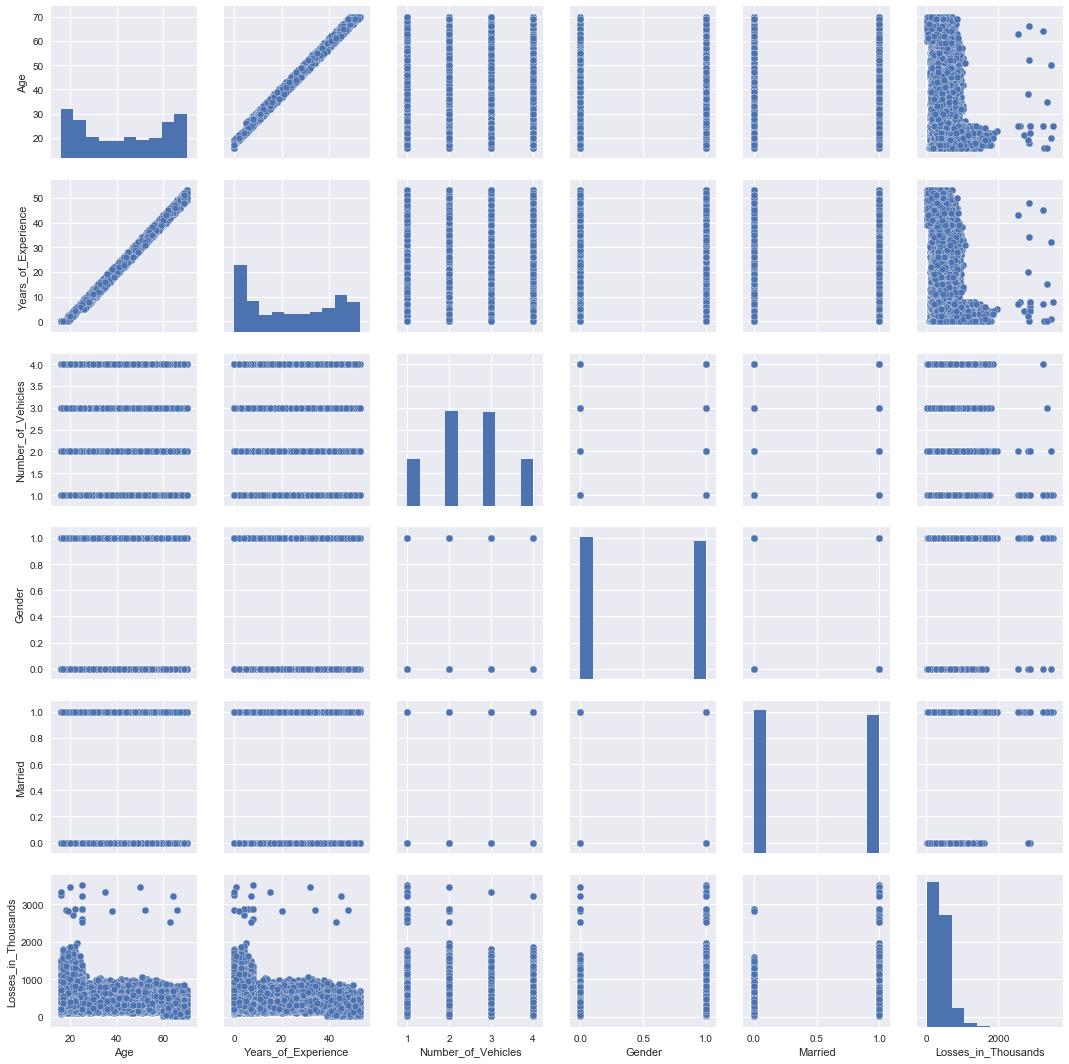

In [20]:
# Pair Plot
sns.pairplot(loss_data)
plt.show()

## Distribution Plot (a.k.a. Histogram)

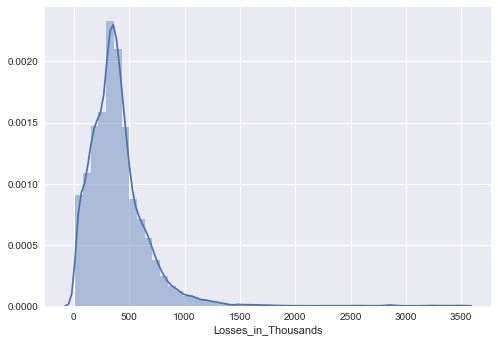

In [23]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(loss_data.Losses_in_Thousands)
plt.show()

## Boxplot

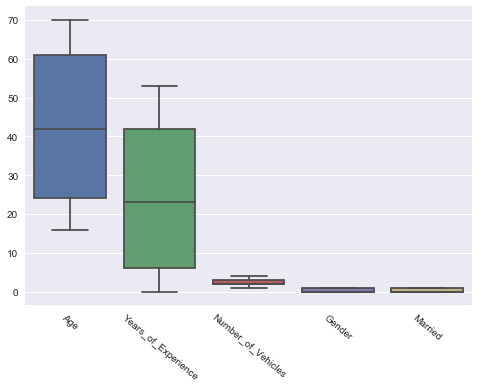

In [26]:
# Boxplot
sns.boxplot(data=loss_data.ix[:,(0,1,2,3,4)], palette="deep")
plt.xticks(rotation=-40)
plt.show()

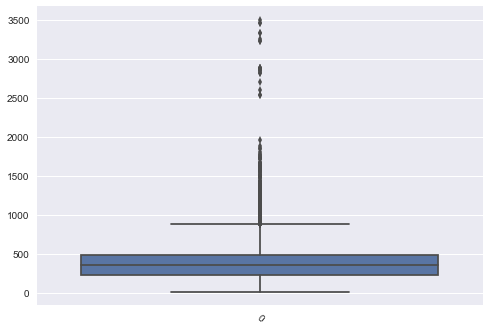

In [27]:
# Boxplot for Losess_in_Thousabds
sns.boxplot(data=loss_data.ix[:,5], palette="deep")
plt.xticks(rotation=-40)
plt.show()

* From the pair and distribution plots you can clearly see that the frequency plot of Losses_in_Thousand variable is skewed. And there is a positive linear relation between Age and Years_of_Experience. <br>
* The box plot of all dependent variables shows the data is normally distributed and well suited for analysis.
* But, the boxplot of Losses_in_Thousand variable shows that there are so many outliers, which has to take care of. <br>
* So, from here we can make linear regression model with outliers or without outliers. But to see the different result I will create two model with and without outliers in Losses_in_Thousand.

<a id="winsorization"></a>
## Winsorization
<hr>
#### What we going to do is, we will take the upper and lower bounds values from box plot and assigned it to outliers.  So, that all the outliers will be inside the box plot range.

In [21]:
# Extracting Quantiles values, IQR and Upper & Lower Bounds from data.
q = loss_data['Losses_in_Thousands'].quantile([.25, .75]) # Using quantile function for getting Q1(25%) and Q3(75%) quantile
Q1 = q.iloc[0]
Q3 = q.iloc[1]
IQR = Q3-Q1 # Finding interquartile range (IQR)
LB = Q1-1.5 * IQR # Finding Lower bound
UB = Q3+1.5 * IQR # Finding Upper bound

In [22]:
# Counting number of outliers in data. 
loss_data['Losses_in_Thousands'][(loss_data['Losses_in_Thousands'] < LB) | (loss_data['Losses_in_Thousands'] > UB)].count() 

585

In [23]:
# So, there are total 585 outliers in Losses_in_Thousands and we will be assigning all of this to the upper bound 
loss_data['Losses_in_Thousands'][loss_data['Losses_in_Thousands']>UB] = UB
loss_data['Losses_in_Thousands'][loss_data['Losses_in_Thousands']<LB] = LB

C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


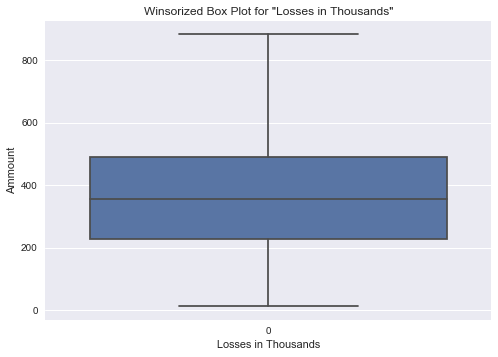

In [24]:
# Boxplot
sns.boxplot(data=loss_data.ix[:,5], palette="deep")
plt.title('Winsorized Box Plot for "Losses in Thousands"')
plt.xlabel('Losses in Thousands')
plt.ylabel('Ammount')
plt.xticks(rotation=0)
plt.show()

#### From the above box plot, you can see that all the outliers are gone and all of them are now converted to the upper bound value of the box plot.

<a id="linearreg"></a>
# === Linear Regression ===
<hr>
First, we have to separate the target variable from all others variable in two separate variables X and y. <br>
**Note:** Only those variables are selected who have a good correlation with **Losses_in_Thousands** i.e. **Age, Years_of_Experience and Married** 

In [25]:
# X contains all other variables
X = loss_data.ix[:,(1,3,4)]
X.head(5)

,Years_of_Experience,Gender,Married
0,5,1,0
1,10,0,1
2,37,1,0
3,31,0,0
4,3,1,1


In [26]:
# y contains Target variables
y = loss_data.ix[:,5]
y.head(5)

0    203.319595
1    402.197302
2    553.132096
3    292.430579
4    246.540576
Name: Losses_in_Thousands, dtype: float64

### Now, we will split the data into test data and train data, in 70-30%.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [28]:
print("Training Dataset Size:",X_train.shape)
print("Test Dataset Size:",X_test.shape)

Training Dataset Size: (10703, 3)
Test Dataset Size: (4587, 3)


### Building a model using Scikit Learn :

In [29]:
regr = linear_model.LinearRegression() # Creating linear regression object
regr.fit(X_train, y_train) # Training the model using the training sets

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Making predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([ 240.73197687,  417.08829361,  370.37023344, ...,  388.83792624,
        522.92221722,  566.91876595])

In [31]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [  -5.65007347   77.89698956  117.13407056]


In [32]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 28792.09


In [33]:
print('R Square Value: %.2f' % r2_score(y_test, y_pred)) # If the value is near to -1 or 1 then it is a perfect prediction

R Square Value: 0.35


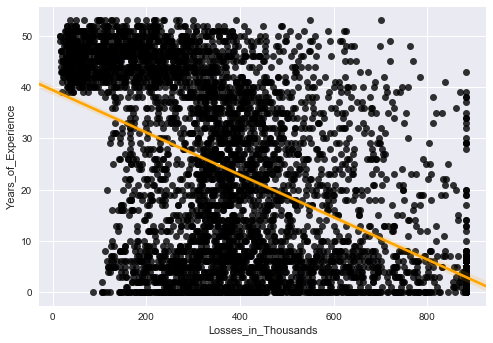

In [35]:
# Ploting the Outputs
# Plot outputs
sns.regplot(y_test, X_test['Years_of_Experience'], color='black', line_kws={'color':'orange'})
plt.show()

<a id="conclusion"></a>
# Conclusion
<hr>
The R Square **0.35** is  same as we got with Stats Model. Very low and very less corelation between the dependent and independent variable. 

[[Back to Top](#head)]